# SymbolicFactorGraph

A `SymbolicFactorGraph` is a factor graph consisting purely of `SymbolicFactor` objects. It represents the structure or topology of a probabilistic graphical model (like a Markov Random Field) without the numerical details.

It's primarily used to *illustrate* symbolic elimination, which determines the structure of the resulting Bayes net or Bayes tree and finds an efficient variable elimination ordering (e.g., using COLAMD or METIS).

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/gtsam/symbolic/doc/SymbolicFactorGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet gtsam-develop

Note: you may need to restart the kernel to use updated packages.


In [13]:
from gtsam import SymbolicFactorGraph, Ordering
from gtsam.symbol_shorthand import X, L
import graphviz

## Creating and Manipulating Symbolic Factor Graphs

Symbolic Factor Graph:
 
size: 5
factor 0:   x0
factor 1:   x0 x1
factor 2:   x1 x2
factor 3:   x0 l1
factor 4:   x1 l2


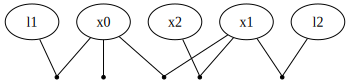

In [12]:
# Create an empty graph
graph = SymbolicFactorGraph()

# Add factors (using convenience methods)
graph.push_factor(X(0)) # Unary
graph.push_factor(X(0), X(1))
graph.push_factor(X(1), X(2))
graph.push_factor(X(0), L(1))
graph.push_factor(X(1), L(2))

# Print the graph structure
graph.print("Symbolic Factor Graph:\n")

# Visualize the graph using Graphviz
graphviz.Source(graph.dot())

## Symbolic Elimination

We can perform symbolic elimination to get the structure of the resulting Bayes net or Bayes tree.

In [16]:
# Define an elimination ordering (can also be computed automatically)
ordering = Ordering([L(1), L(2), X(0), X(1), X(2)])


Resulting Symbolic Bayes Net:
 
size: 5
conditional 0:  P( l1 | x0)
conditional 1:  P( x0 | x1)
conditional 2:  P( l2 | x1)
conditional 3:  P( x1 | x2)
conditional 4:  P( x2)


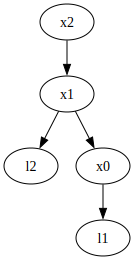

In [18]:
# Eliminate sequentially to get a Bayes Net structure
bayes_net = graph.eliminateSequential(ordering)
bayes_net.print("\nResulting Symbolic Bayes Net:\n")

# Visualize the Bayes Net using Graphviz
graphviz.Source(bayes_net.dot())


Resulting Symbolic Bayes Tree:
: cliques: 4, variables: 5

Resulting Symbolic Bayes Tree:
- P( x1 x2)

Resulting Symbolic Bayes Tree:
| - P( x0 | x1)

Resulting Symbolic Bayes Tree:
| | - P( l1 | x0)

Resulting Symbolic Bayes Tree:
| - P( l2 | x1)


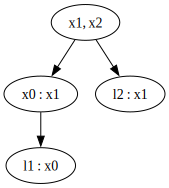

In [19]:
# Eliminate using Multifrontal method to get a Bayes Tree structure
bayes_tree = graph.eliminateMultifrontal(ordering)
bayes_tree.print("\nResulting Symbolic Bayes Tree:\n")

# Visualize the Bayes Tree using Graphviz
graphviz.Source(bayes_tree.dot())